In [126]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('blobs2.csv')
t = np.array(df.values)
df_c = pd.read_csv('cancer.csv')
t_c = np.array(df.values)
df_sb = pd.read_csv('spambase.csv')
t_sb = np.array(df.values)

In [112]:
def split(t):
    cls_data = {}
    for i in range(2):
        cls_data[i] = np.argwhere(t[:,-1]==i)
        cls_data[i] = cls_data[i][:,0]
    train = np.array([np.ones(t.shape[1])])
    val = np.array([np.ones(t.shape[1])])
    for i in range(2):
        ln = cls_data[i].shape[0]
        l = ln*9//10
        train = np.concatenate((train, t[cls_data[i][:l]]), axis=0)
        val = np.concatenate((val, t[cls_data[i][l:]]), axis=0)
    train = train[1:]
    val = val[1:]
    np.random.shuffle(train)
    np.random.shuffle(val)
    return train, val

In [113]:
X = t[:,:-1]
Y = t[:,-1]

In [114]:
train, val = split(t)
train_X = train[:,:-1]
train_Y = train[:,-1]
val_X = val[:,:-1]
val_Y = val[:,-1]

In [129]:
def draw_res(clf, X = X, Y = Y, val_X = val_X, val_Y = val_Y):
    plt.clf()
    plt.scatter(val_X[:,0], val_X[:,1], s=80, facecolors='none', edgecolor='k', zorder = 10)
    plt.scatter(X[:,0], X[:,1], s=20, c=Y, cmap=plt.cm.Set1, zorder=10, edgecolor='k')
    x_min = np.min(X[:,0])
    x_max = np.max(X[:,0])
    y_min = np.min(X[:,1])
    y_max = np.max(X[:,1])
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Set1)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.show()

In [116]:
###1###
clf = SVC(kernel='linear')
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

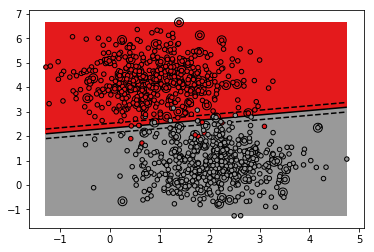

In [117]:
draw_res(clf)

In [118]:
clf = SVC(kernel='poly', degree=2)
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

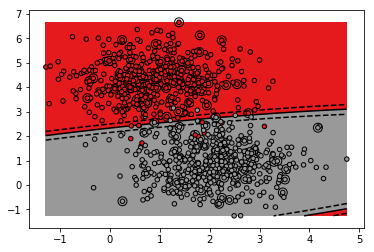

In [119]:
draw_res(clf)

In [120]:
clf = SVC(kernel='poly', degree=3)
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

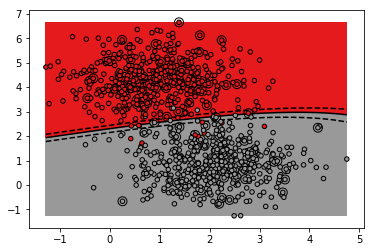

In [121]:
draw_res(clf)

In [122]:
clf = SVC(kernel='poly', degree=5)
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

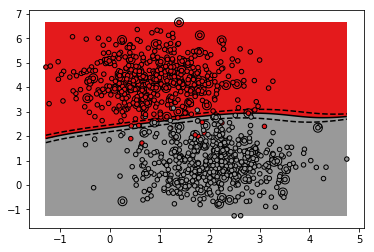

In [123]:
draw_res(clf)

In [124]:
clf = SVC(kernel='rbf')
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

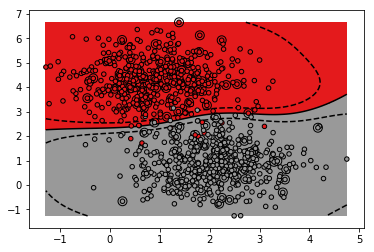

In [125]:
draw_res(clf)

In [127]:
###2###
X_c = t_c[:,:-1]
Y_c = t_c[:,-1]
train_c, val_c = split(t_c)
train_X_c = train_c[:,:-1]
train_Y_c = train_c[:,-1]
val_X_c = val_c[:,:-1]
val_Y_c = val_c[:,-1]

In [128]:
X_sb = t_sb[:,:-1]
Y_sb = t_sb[:,-1]
train_sb, val_sb = split(t_sb)
train_X_sb = train_sb[:,:-1]
train_Y_sb = train_sb[:,-1]
val_X_sb = val_sb[:,:-1]
val_Y_sb = val_sb[:,-1]

In [182]:
X_c_norm, Y_c_norm, train_X_c_norm, train_Y_c_norm, val_X_c_norm, val_Y_c_norm = norm_data(X_c, Y_c, train_X_c, train_Y_c, val_X_c, val_Y_c)

In [183]:
X_sb_norm, Y_sb_norm, train_X_sb_norm, train_Y_sb_norm, val_X_sb_norm, val_Y_sb_norm = norm_data(X_sb, Y_sb, train_X_sb, train_Y_sb, val_X_sb, val_Y_sb)

In [181]:
def norm_data(X, Y, train_X, train_Y, val_X, val_Y):
    X = (X-np.min(X, axis=0))/(np.max(X, axis=0)-np.min(X, axis=0))
    train_X = (train_X-np.min(X, axis=0))/(np.max(X, axis=0)-np.min(X, axis=0))
    val_X = (val_X-np.min(X, axis=0))/(np.max(X, axis=0)-np.min(X, axis=0))
    return X, Y, train_X, train_Y, val_X, val_Y

In [230]:
def fun(data):
    X, Y, train_X, train_Y, val_X, val_Y = data
    res = {}
    for c in np.arange(0.1, 30, 0.1):
        res[str(c)] = {}
        for kern in ['linear', 'poly', 'rbf']:
            name = kern
            if kern == 'poly':
                for deg in [2, 3, 5]:
                    clf = SVC(kernel=kern, C=c, degree=deg)
                    clf.fit(train_X, train_Y)
                    name = 'poly' + str(deg)
                    res[str(c)][name] = {}
                    res[str(c)][name]["n_vec"] = sum(clf.n_support_)
                    res[str(c)][name]["train"] = (np.sum(np.abs(clf.predict(train_X)-train_Y))/train_Y.shape[0])
                    res[str(c)][name]["test"] = (np.sum(np.abs(clf.predict(val_X)-val_Y))/val_Y.shape[0])
            else:
                clf = SVC(kernel=kern, C=c)
                clf.fit(train_X, train_Y)
                res[str(c)][name] = {}
                res[str(c)][name]["n_vec"] = sum(clf.n_support_)
                res[str(c)][name]["train"] = (np.sum(np.abs(clf.predict(train_X)-train_Y))/train_Y.shape[0])
                res[str(c)][name]["test"] = (np.sum(np.abs(clf.predict(val_X)-val_Y))/val_Y.shape[0])
    return res

In [231]:
data_c = X_c, Y_c, train_X_c, train_Y_c, val_X_c, val_Y_c
data_sb = X_sb, Y_sb, train_X_sb, train_Y_sb, val_X_sb, val_Y_sb
data_c_norm = X_c_norm, Y_c_norm, train_X_c_norm, train_Y_c_norm, val_X_c_norm, val_Y_c_norm
data_sb_norm = X_sb_norm, Y_sb_norm, train_X_sb_norm, train_Y_sb_norm, val_X_sb_norm, val_Y_sb_norm

In [232]:
res_c = fun(data_c_norm)

In [233]:
res_sb = fun(data_sb_norm)

In [234]:
def draw(res, kern):
    X = []
    Y_train = []
    Y_test = []
    for v_b in res.values():
        v = v_b[kern]
        X += [v["n_vec"]]
        Y_train += [v["train"]]
        Y_test += [v["test"]]
    X = np.array(X)
    Y_train = np.array(Y_train)
    Y_test = np.array(Y_test)
    sorted_args = np.argsort(X)
    plt.scatter(X[sorted_args], Y_train[sorted_args], color="r", label="train", s=10)
    plt.scatter(X[sorted_args], Y_test[sorted_args], color="g", label="test", s=10)
    plt.scatter(X[sorted_args], (Y_train-Y_test)[sorted_args], color="b", label="div_train_test", s=10)
    plt.legend()
    plt.xlabel('n_vectors')
    plt.ylabel('errors')
    plt.show()

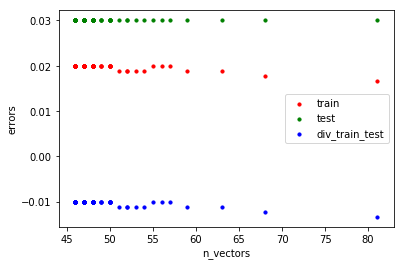

In [235]:
draw(res_c, "linear")

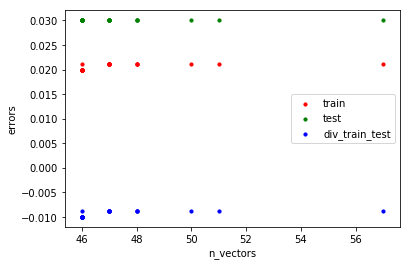

In [236]:
draw(res_c, "poly2")

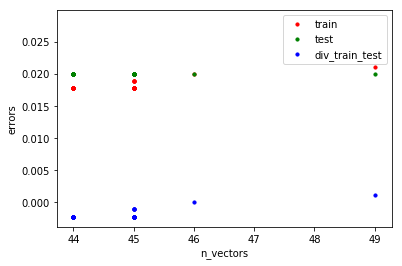

In [237]:
draw(res_c, "poly3")

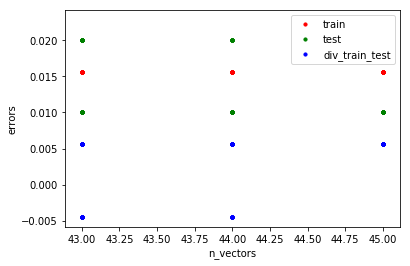

In [238]:
draw(res_c, "poly5")

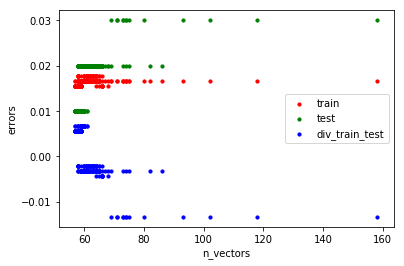

In [240]:
draw(res_c, "rbf")

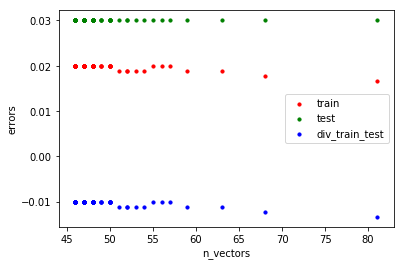

In [241]:
draw(res_sb, "linear")

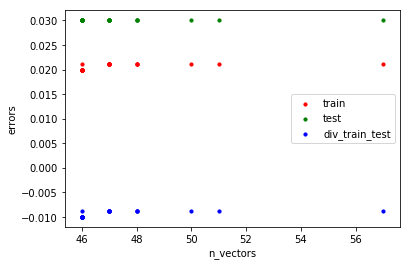

In [242]:
draw(res_sb, "poly2")

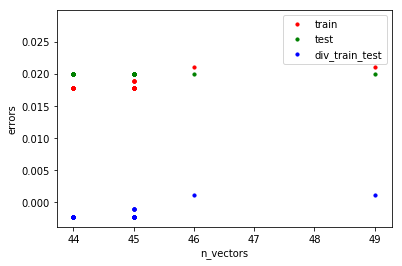

In [243]:
draw(res_sb, "poly3")

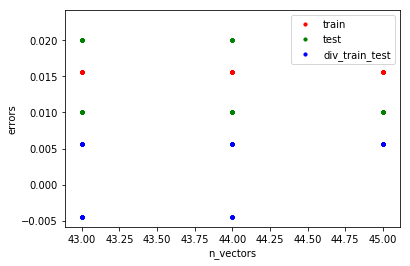

In [244]:
draw(res_sb, "poly5")

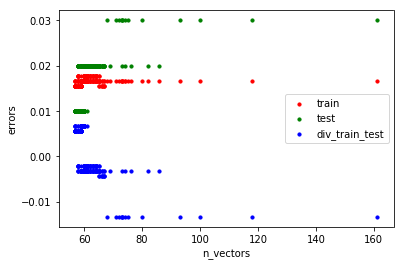

In [245]:
draw(res_sb, "rbf")